<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-1">Background</a></span><ul class="toc-item"><li><span><a href="#Integrated-Stellar-Populations" data-toc-modified-id="Integrated-Stellar-Populations-1.1">Integrated Stellar Populations</a></span></li></ul></li><li><span><a href="#The-Basic-Model" data-toc-modified-id="The-Basic-Model-2">The Basic Model</a></span></li><li><span><a href="#Testing-against-Complex-Data" data-toc-modified-id="Testing-against-Complex-Data-3">Testing against Complex Data</a></span></li></ul></div>

In [2]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl, seaborn as sns
import pandas as pd
import pcmdpy as ppy
%matplotlib inline

In [8]:
try:
    ppy.gpu_utils.initialize_gpu(n=0)
    GPU_AVAIL = True
except:
    GPU_AVAIL = False

Can't initialize GPU, _GPU_AVAIL is set to False


In [9]:
f = ppy.instrument.m31_filters()
iso_model = ppy.isochrones.Isochrone_Model(f)
driv = ppy.driver.Driver(iso_model, gpu=GPU_AVAIL)

In [19]:
def plot_pcmd(pcmd, bins=100, norm=mpl.colors.LogNorm(), ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()
    g = ppy.galaxy.DefaultSSP.get_model(np.array([0., -2., 2., 10.]))
    ax.hist2d(pcmd[1], pcmd[0], bins=bins, norm=norm)
    iso_model.plot_isochrone(g, axes=ax)
    if title is not None:
        ax.set_title(title)
    return ax

In [23]:
def plot_model(model, N_im=256, **plot_kwargs):
    pcmd, _ = driv.simulate(model, N_im)
    return plot_pcmd(pcmd, **plot_kwargs)

# Background

## Integrated Stellar Populations

NameError: name 'phot_agn_only' is not defined

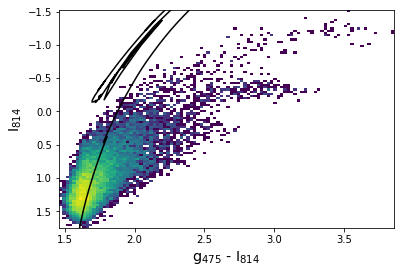

In [24]:
plot_model(ppy.galaxy.DefaultSSP.get_model(np.array([0., -2., 2., 10.])), N_im=128)

# The Basic Model

# Testing against Complex Data

# 